In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Bajamos los datos

In [10]:
# !wget -O datos.zip https://www.dropbox.com/scl/fi/v6qfj1ktarocr8sl02r8k/datos.zip?rlkey=2u060s5619gvcvnnnhq93rn4e&st=jy3dah88&dl=1
!unzip datos.zip

Archive:  datos.zip
   creating: datos/
  inflating: datos/X_train.csv       
  inflating: datos/X_test.csv        
  inflating: datos/y_test.csv        
  inflating: datos/y_train.csv       


In [11]:
class_names = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

# Cargamos los archivos

In [12]:
X_train = np.loadtxt("datos/X_train.csv", delimiter=",")
y_train = np.loadtxt("datos/y_train.csv", delimiter=",").astype(int)
X_test = np.loadtxt("datos/X_test.csv", delimiter=",")
y_test = np.loadtxt("datos/y_test.csv", delimiter=",").astype(int)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5000, 784), (5000,), (500, 784), (500,))

# Revisamos la cantida de muestras por cada clase

In [17]:
np.bincount(y_train), np.bincount(y_test)

(array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500]),
 array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50]))

# Visualizamos

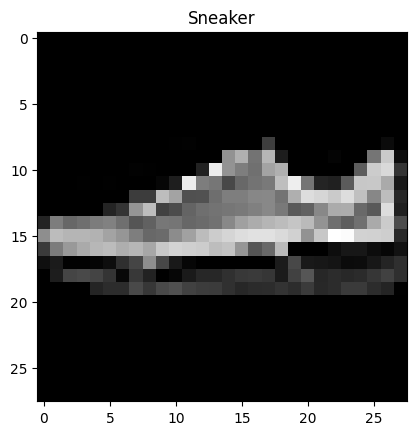

In [16]:
ix = 7
plt.imshow(X_test[ix].reshape(28,28), cmap="gray")
plt.title(class_names[y_test[ix]]);

# Separamos en datos de desarrollo

Garantizamos que las clases siguen igualmente balanceadas (estratificación)

test_size = 0.2 nos dice que vamos a serpara el 20% de los datos para hacer el testeo final, quedandonos con el 80% para training.

In [19]:
from sklearn.model_selection import train_test_split
X_newtrain, X_dev, y_newtrain, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

np.bincount(y_newtrain), np.bincount(y_dev)

(array([400, 400, 400, 400, 400, 400, 400, 400, 400, 400]),
 array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100]))

# KNN

## Consigna:

* Implementar KNN con distancia coseno

$$d(A,B) = 1-\frac{A\cdot B}{\|A\|\|B\|}$$

* Computar la distancia entre los datos de entrenamiento y los desarrollo
* Ordenar estas distancias de menor a mayor
* Para cada dato de desarrollo elegir las primeras $k$ muestras y listar de que clase son
* Calcular la moda
* Medir la performance del sistema como:

$$ \text{exactitud} = \frac{\text{cantidad de muestra bien reconocidas}}{\text{cantidad de muestras totales}}$$

Recomendación, primero desarrollar en forma lenta utilizando loops *for*, y una vez resulto el problema, pasar a optimizarlo utilizando las operaciones vectorizadas a lo *numpy* para evitar los loops.

# Validación Cruzada

## Consigna:

* Partir los datos en una partición de 5 partes manteniendo el mismo balance de clases en cada parte
* Iterar sobre estas partes, tomando 4 partes para entrenar y 1 para desarrollo de forma cíclia
* Medir la performance para cada parte
* Tomar el promedio

* Realizar la validación cruzada para distintos valores de $k$ de KNN, y encontrar el mejor